In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import csv
import xml.etree.ElementTree as ET
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys, os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *

from data_manager import *
from metadata import *

Setting environment for Precision WorkStation


No vtk


In [3]:
from annotation_utilities import *
from registration_utilities import *
from conversion import *

In [4]:
brain_annotation_file_map = \
{
'LM30new': ROOT_DIR + '/lauren_data/LM30_new.xml',
'LM86': ROOT_DIR + '/lauren_data/LM86_FINAL_3D_SNr.xml',
'LM27': ROOT_DIR + '/lauren_data/LSC_LM27_3D_FINAL.xml',
    
'LM41': ROOT_DIR + '/lauren_data/LM41_Final.xml',
'LM22': ROOT_DIR + '/lauren_data/LM22_FINAL.xml',
'LM17': ROOT_DIR + '/lauren_data/CSC_LM17_3D_FINAL.xml',

'LM42_LM37': ROOT_DIR + '/lauren_data/LM42_LM37_FINAL.xml',
'LM37': ROOT_DIR + '/lauren_data/mSC_LM37_3D_FINAL.xml',
'LM95': ROOT_DIR + '/lauren_data/mSC_LM95_FINAL.xml',    

'LM38': ROOT_DIR + '/lauren_data/LM38_FINAL_FLIP_L.xml', # fixed orientation to be the same as others
'LM32': ROOT_DIR + '/lauren_data/LM32_FINAL.xml',
    
'LM40new': ROOT_DIR + '/lauren_data/LM40_new.xml',
'LM54': ROOT_DIR + '/lauren_data/DR_LM54_FINAL.xml',
'LM94_LM96_LM25': ROOT_DIR + '/lauren_data/DR_LM94_96_25_MERGE_FINAL2.xml',
    
'LM46': ROOT_DIR + '/lauren_data/LM46_FINAL.xml',    
'LM84': ROOT_DIR + '/lauren_data/LM84_FINAL.xml',
    
'LM31': ROOT_DIR + '/lauren_data/LM31_FINAL.xml',
'LM48': ROOT_DIR + '/lauren_data/LM48_FINAL.xml',
# 'LM51': ROOT_DIR + '/lauren_data/PPN_LM51_FINAL_NEW.xml',
# 'LM45': ROOT_DIR + '/lauren_data/PPN_LM45_FINAL_NEW.xml',
    
# 'LM97_LM98': ROOT_DIR + '/lauren_data/VM_LM97_98_MERGE_FINAL_2.xml',
    
# 'LM72': ROOT_DIR + '/lauren_data/LM72_3D_SNrl_FINAL_scaled.xml',
}

LM38


Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name 

['RMC_L', '3N_L', 'SNR_L']
surround size (in voxels): 20.0


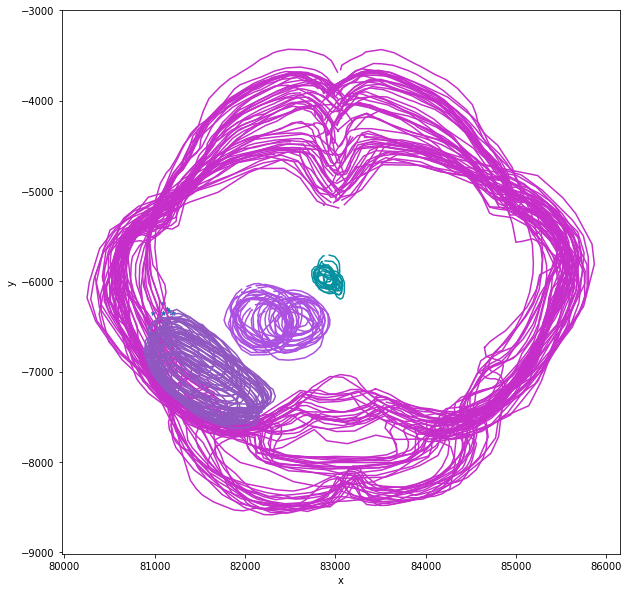

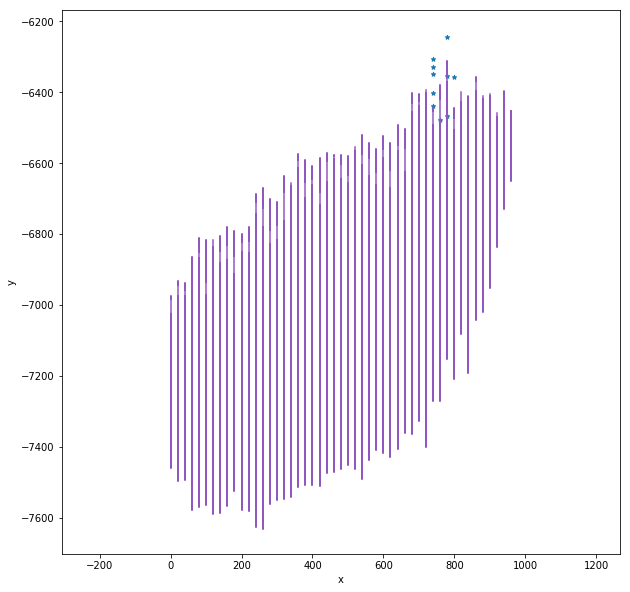

In [5]:
# for stack in brain_annotation_file_map.keys():
for stack in ['LM38']:
    
    print stack

    xmlfile = brain_annotation_file_map[stack]
    download_from_s3(xmlfile)

    tree = ET.parse(xmlfile)
    root = tree.getroot()

    neurolucida_name_map = \
    {"Contour Name 1": 'RMC_L',
    "Contour Name 2": '3N_L',
    # "Contour Name 3": 'fr',
    'Brain': 'outline',
     'Brain Outline': 'outline',
     '3N': '3N_L',
     'RN': 'RMC_L',
     'RedNuc': 'RMC_L',
     'SNR': 'SNR_L'}

    prefix = '{http://www.mbfbioscience.com/2007/neurolucida}'

    contours = defaultdict(list)

    # Contour and marker coordinates are in um already.

    for item in root.findall(prefix+'contour'):
        name = item.attrib['name']
        if name not in neurolucida_name_map:
    #         raise Exception('Name %s in stack %s not recognized' % (name, stack))
            sys.stderr.write('Name %s in stack %s not recognized. Ignored.\n' % (name, stack))
            continue
        name = neurolucida_name_map[name]
        curr_contour = []
    #     try:
    #         resolution = float(item.findall(prefix+'resolution')[0].text)
    #         print resolution
    #     except:
    #         pass
        for p in item.findall(prefix+'point'):
            curr_contour.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
        contours[name].append(np.array(curr_contour))

    contours.default_factory = None

    markers = {}
    # name = 'SNR'
    name = 'All'

    for item in root.findall(prefix+'marker'):
        curr_markers = []
        for p in item.findall(prefix+'point'):
            curr_markers.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
        markers[name] = np.array(curr_markers)

    contour_colors = dict(zip(contours.keys(), np.array(random_colors(len(contours)))/255.))
    marker_colors = dict(zip(markers.keys(), np.array(random_colors(len(markers)))/255.))


    # plt.figure(figsize=(10, 10));

    # for name, cnts in contours.iteritems():    
    # #     print name
    # #     if parse_label(name)[1] == 'L' and \
    # #     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
    # #     if parse_label(name)[0] == '7N':
    #     for cnt in cnts:
    #         plt.plot(cnt[:, 2], cnt[:, 1], c=contour_colors[name]);
    # plt.axis('equal');
    # plt.xlabel('x');
    # plt.ylabel('z');

    ##############################

    plt.figure(figsize=(10, 10));
    for name, cnts in contours.iteritems():    
    #     if parse_label(name)[1] == 'L' and \
    #     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
    #     if parse_label(name)[0] == '7N':
        for cnt in cnts:
            plt.plot(cnt[:, 0], cnt[:, 1], c=contour_colors[name]);

    # plt.scatter(markers['SNR'][:,0], markers['SNR'][:,1], s=20, marker='*')
    plt.scatter(markers['All'][:,0], markers['All'][:,1], s=20, marker='*')

    # for name, mkrs in markers.iteritems():
    #     plt.scatter(mkrs[:, 0], mkrs[:, 1], c=marker_colors[name], s=1, zorder=9);

    plt.xlabel('x');
    plt.ylabel('y');
    plt.axis('equal');
    # plt.legend();

    ##############################

    plt.figure(figsize=(10, 10));
    for name, cnts in contours.iteritems():    
    #     if parse_label(name)[1] == 'L' and \
    #     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
    #     if parse_label(name)[0] == '7N':
        if name == 'SNR_L':
            for cnt in cnts:
                plt.plot(cnt[:, 2], cnt[:, 1], c=contour_colors[name]);

    plt.scatter(markers['All'][:,2], markers['All'][:,1], s=20, marker='*')

    # for name, mkrs in markers.iteritems():
    #     plt.scatter(mkrs[:, 0], mkrs[:, 1], c=marker_colors[name], s=1, zorder=9);

    plt.xlabel('x');
    plt.ylabel('y');
    plt.axis('equal');
    # plt.legend();


    structure_subset = \
    [name for name in contours.keys() if parse_label(name)[0] in all_known_structures]
    print structure_subset

    out_resolution = '10.0um'
    out_resolution_um = convert_resolution_string_to_um(resolution=out_resolution)

    # Lauren's data; coronal; 
    # x=left to right; y= superior to inferior (wrong! should be inferior to superior); z= anterior to posterior (they are coronal sections).

    markers_orientationCorrected = {name_u: mkrs3d[:, [2,1,0]]*[1,-1,1] for name_u, mkrs3d in markers.iteritems()}
    markers_atlasResol = {name: mkrs3d / out_resolution_um for name, mkrs3d in markers_orientationCorrected.iteritems()}

    contours_orientationCorrected = {convert_to_left_name(name_u): [cnt[:, [2,1,0]]*[1,-1,1]
                                     for cnt in cnts3d] 
                           for name_u, cnts3d in contours.iteritems()}

    contours_atlasResol = {name: [cnt / out_resolution_um
                                    for cnt in cnts3d if len(cnt) > 3] 
                           for name, cnts3d in contours_orientationCorrected.iteritems()}
    #                                             if name in structure_subset}


    # Convert contours to volumes

    valid_level = .5

    surround_distance_um = 200.
    surround_distance_voxel = surround_distance_um / out_resolution_um
    print "surround size (in voxels):", surround_distance_voxel

    # Reconstruct brain.

    reconstructed_brain = {}

    for name, cnts3d in contours_atlasResol.iteritems():
        reconstructed_brain[name] = interpolate_contours_to_volume(interpolation_direction='x',
                                                        contours_xyz=cnts3d, 
                                                        len_interval=20.,
                                                            return_origin_instead_of_bbox=True)

        surround_name = convert_to_surround_name(name, margin='%dum' % surround_distance_um)

        reconstructed_brain[surround_name] = \
        get_surround_volume_v2(vol=reconstructed_brain[name][0], origin=reconstructed_brain[name][1], 
                               wall_level=valid_level, distance=surround_distance_voxel, 
                               prob=True,
                               return_origin_instead_of_bbox=True)

#     # display_volume_sections(reconstructed_brain['SNR_L'][0])
    
#     for s, v in reconstructed_brain.iteritems():
#         vol_fp = DataManager.get_original_volume_filepath_v2(stack_spec=dict(name=stack, 
#                                                                          vol_type='annotationAsScore',
#                                                                 resolution=out_resolution),
                                            
#                                             structure=s)
#         save_data(v[0], vol_fp)
        
#         bbox = volume_origin_to_bbox(v[0], v[1])
#         bbox_fp = DataManager.get_original_volume_bbox_filepath_v2(stack_spec=dict(name=stack, 
#                                                                          vol_type='annotationAsScore',
#                                                                         resolution=out_resolution),
#                                             structure=s)
#         save_data(bbox, bbox_fp)
            
#     # Export markers.

#     for name, mkrs in markers_atlasResol.iteritems():
#         save_data(markers_atlasResol[name], 
#                   DataManager.get_lauren_markers_filepath(stack=stack, structure=name, resolution='10.0um'))